In [1]:
import pandas as pd
import numpy as np
import os
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)




In [2]:
import os
os.getcwd()
os.chdir('../')



In [4]:
path_ = os.getcwd()

In [5]:
# root_dir = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
# sys.path.append(root_dir)

from utils.utils import *
from utils.constants import *
from src.shap import *


D:\anaconda3\Lib\site-packages\shap\utils\_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
D:\anaconda3\Lib\site-packages\shap\utils\_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
D:\anaconda3\Lib\site-packages\shap\utils\_clustering.py:62: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to th

In [6]:

######## Import data ########
y_train = pd.read_csv(path_ + '\\data' + '\\y_train.csv')
y_test = pd.read_csv(path_ + '\\data' + '\\y_test.csv')


stack_train = pd.read_csv(path_ + '\\data' + '\\stacked_X_tr.csv')
stack_test  = pd.read_csv(path_ + '\\data' + '\\stacked_X_te.csv')



#########
# y_train = pd.read_csv(get_absolute_path('y_train.csv', 'data'))
# y_test = pd.read_csv(get_absolute_path('y_test.csv', 'data'))


# stack_train = pd.read_csv(get_absolute_path('stacked_X_tr.csv', 'data'))
# stack_test  = pd.read_csv(get_absolute_path('stacked_X_te.csv', 'data'))

stack_train = stack_train.astype(column_data_extended_types)
stack_test = stack_test.astype(column_data_extended_types)





In [7]:



######## Feature Engineering ##########

# Select numeric and categorical columns
numeric_columns = stack_train.select_dtypes(include=['float64']).columns
categorical_columns = [#'Date', 
                       'Location_ID',
                    #    'Year',
                       'Month',
                       'Week',
                       'Weekday',
                       'Season'
                       ]  # Add any categorical columns here

# Create preprocessing transformers
numeric_transformer = StandardScaler()  # we can use other scalers as well
categorical_transformer = OneHotEncoder(drop=None)  # Use one-hot encoding for categorical columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Fit the preprocessor on training data and transform both train and test data
X_train_preprocessed = preprocessor.fit_transform(stack_train)
X_test_preprocessed  = preprocessor.transform(stack_test)


# Get the column names after one-hot encoding
categorical_encoded_columns = preprocessor.named_transformers_['cat']\
                                    .get_feature_names_out(input_features=categorical_columns)

# Convert X_train_preprocessed and X_test_preprocessed to DataFrames

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed.toarray(), columns=np.concatenate([numeric_columns, categorical_encoded_columns]))
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed.toarray(), columns=np.concatenate([numeric_columns, categorical_encoded_columns]))



https://stats.stackexchange.com/questions/615290/if-feature-importance-is-only-computed-based-on-training-set-does-it-mean-one-s

In [8]:

# ########### Generate SHAP results


# # List of model names
# model_names = ['xgb', 'rf' , 'mlp', 'lin'
# ]

# # Relative path
# rel_path = 'results'

# # # Dictionary to store file paths for each model
# # model_file_paths = {}

# # Loop through each model name
# for model_name in model_names:
#     file_paths = generate_file_paths_for_shap(model_name, rel_path)
#     # model_file_paths[model_name] = file_paths
#     print(f"{model_name.capitalize()} Model File Paths:", file_paths)

#     gen_shap_results(
#         load_file_path = file_paths[0]
#         , save_file_path_1 = file_paths[1]
#         , save_file_path_2 = file_paths[2]
#         , refit_X = X_train_preprocessed_df
#         , refit_y = y_train
#         , figure_dpi = 300
#     )

########### Generate SHAP results on test set


# List of model names
model_names = ['xgb', 'mlp', 'lin', 'lightGBM', 'rf' ]

# Relative path
rel_path = 'results\\cv5_withCategorical_withstd' 

# # Dictionary to store file paths for each model
# model_file_paths = {}

# Loop through each model name



Xgb Model File Paths: ['F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\best_xgb_model.joblib', 'F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\shap_on_test\\best_xgb_shap_bar.png', 'F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\shap_on_test\\best_xgb_shap_val.png']
Tree Based Model...


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


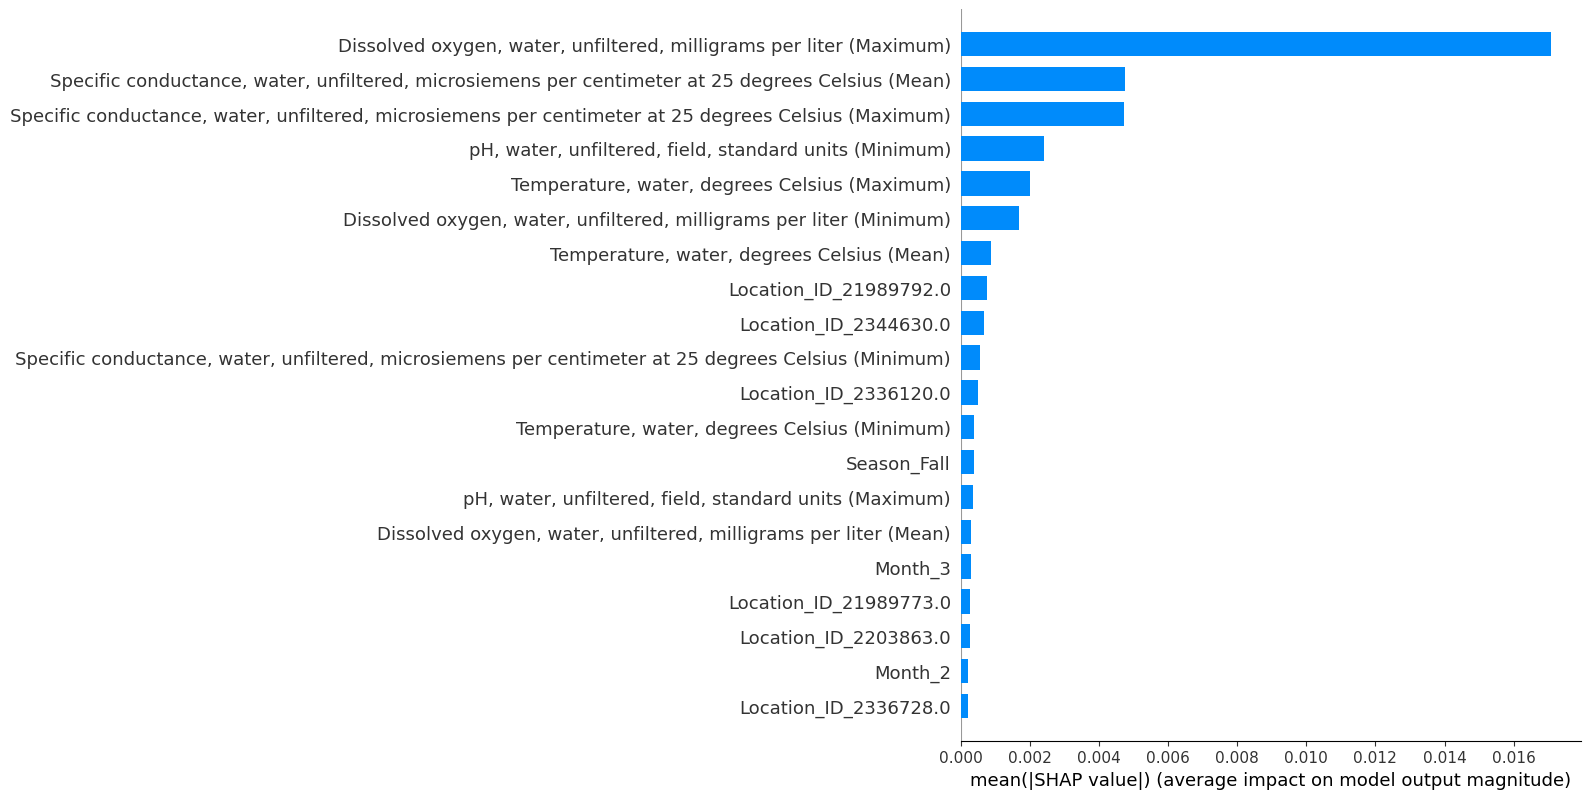

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


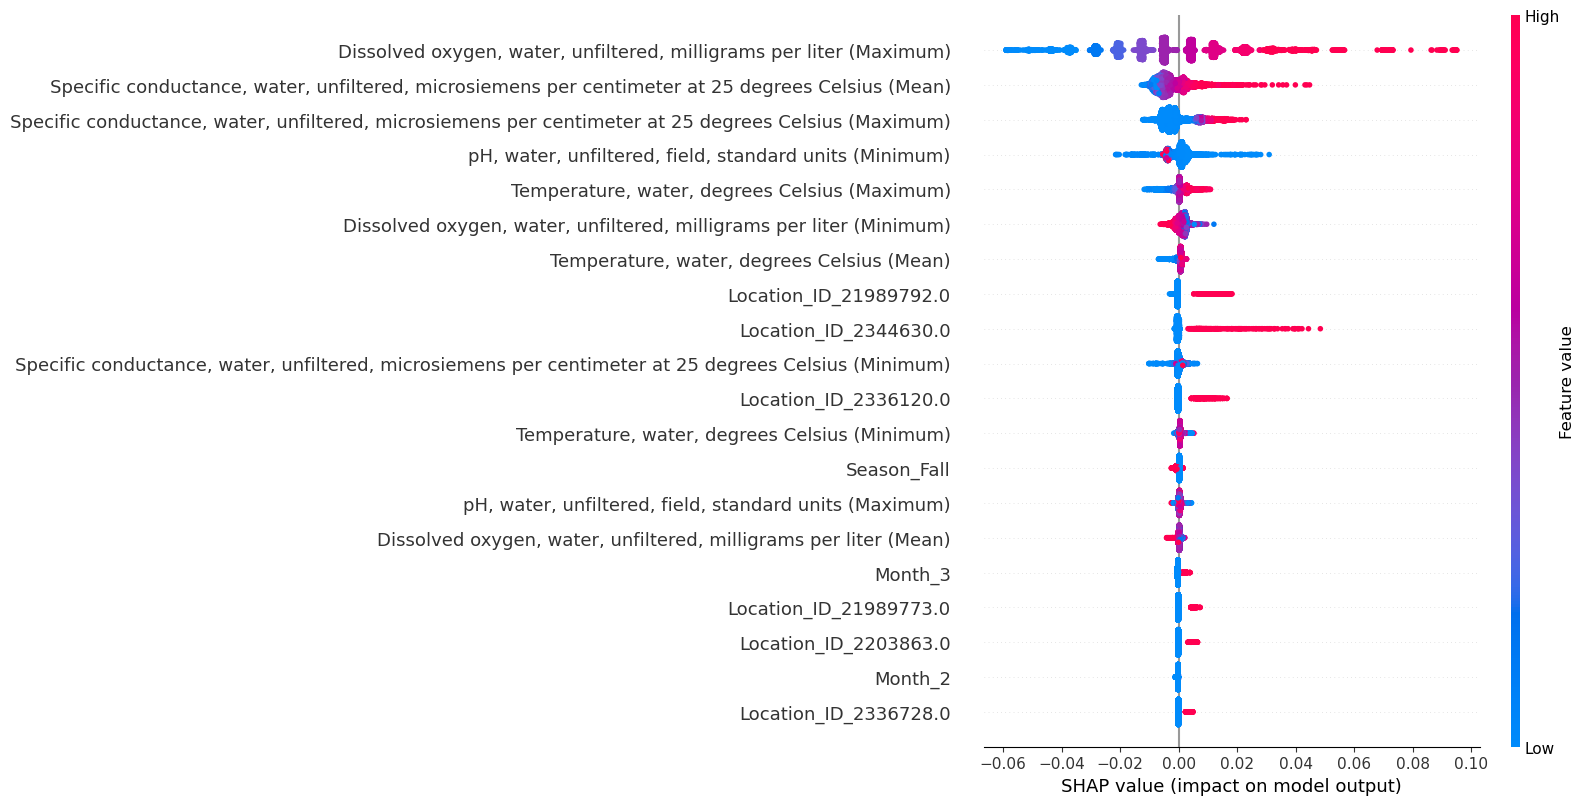

Mlp Model File Paths: ['F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\best_mlp_model.joblib', 'F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\shap_on_test\\best_mlp_shap_bar.png', 'F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\shap_on_test\\best_mlp_shap_val.png']
MLP Model...
This is problematic... I give up
Check _test_run_shap_on_testset_py_mlp.ipynb and _test_run_shap_py.ipynb; cell blocks that are related to MLP...


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/500 [00:00<?, ?it/s]

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


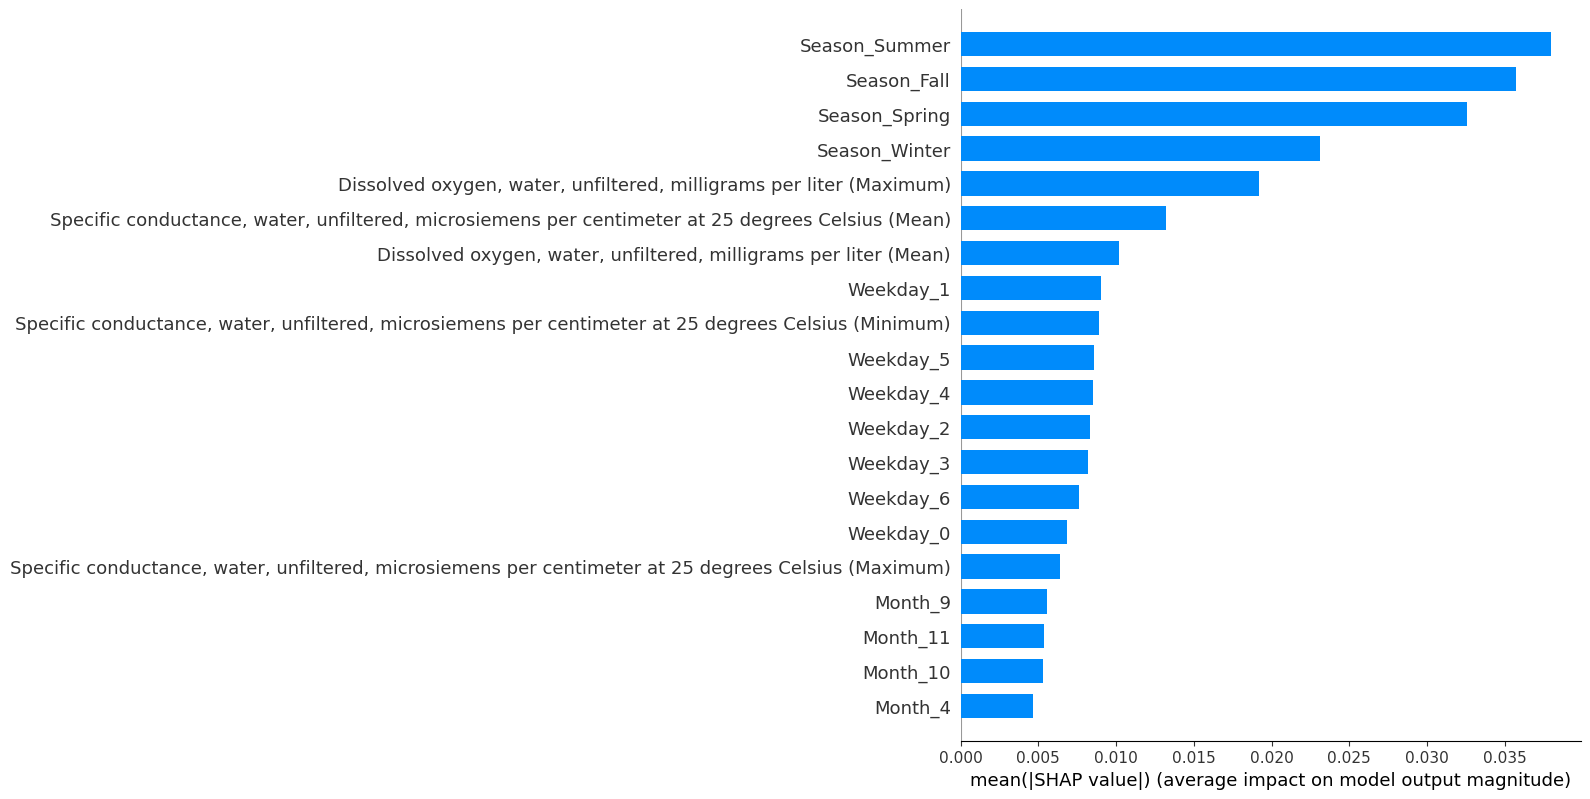

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


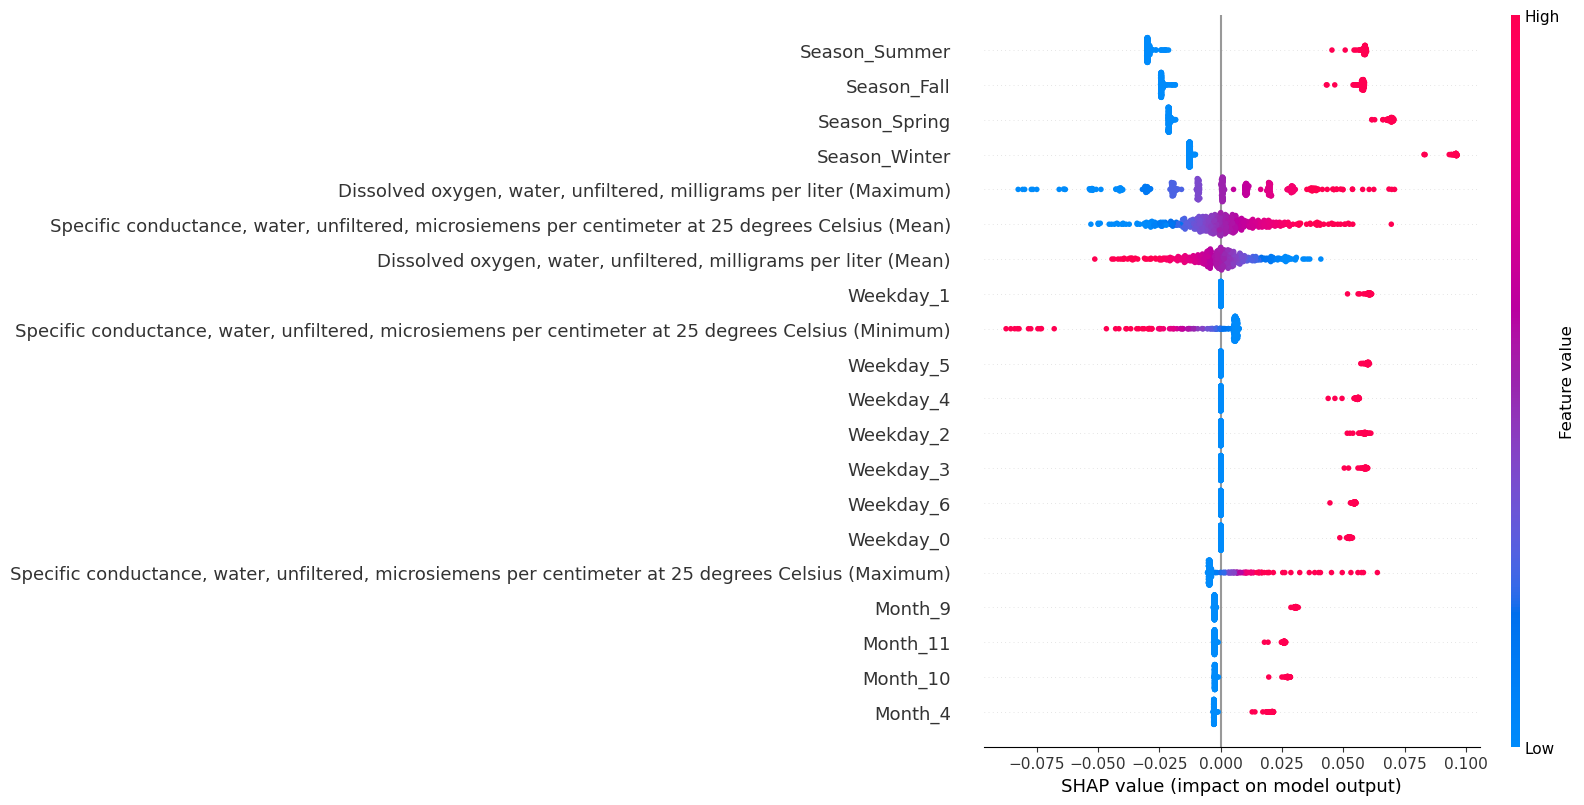

Lin Model File Paths: ['F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\best_lin_model.joblib', 'F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\shap_on_test\\best_lin_shap_bar.png', 'F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\shap_on_test\\best_lin_shap_val.png']
Penalized Linear Model...


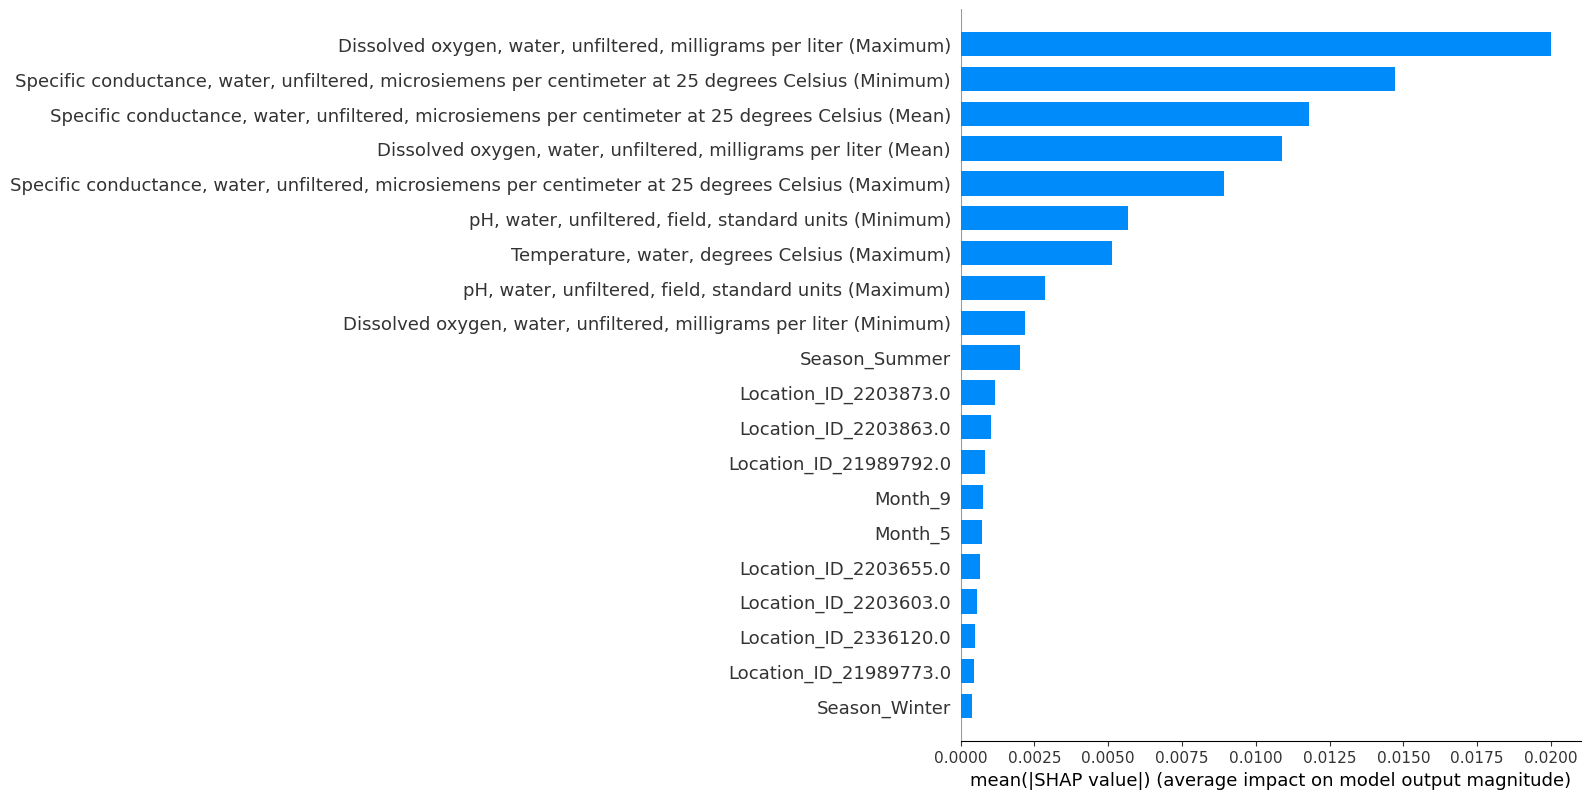

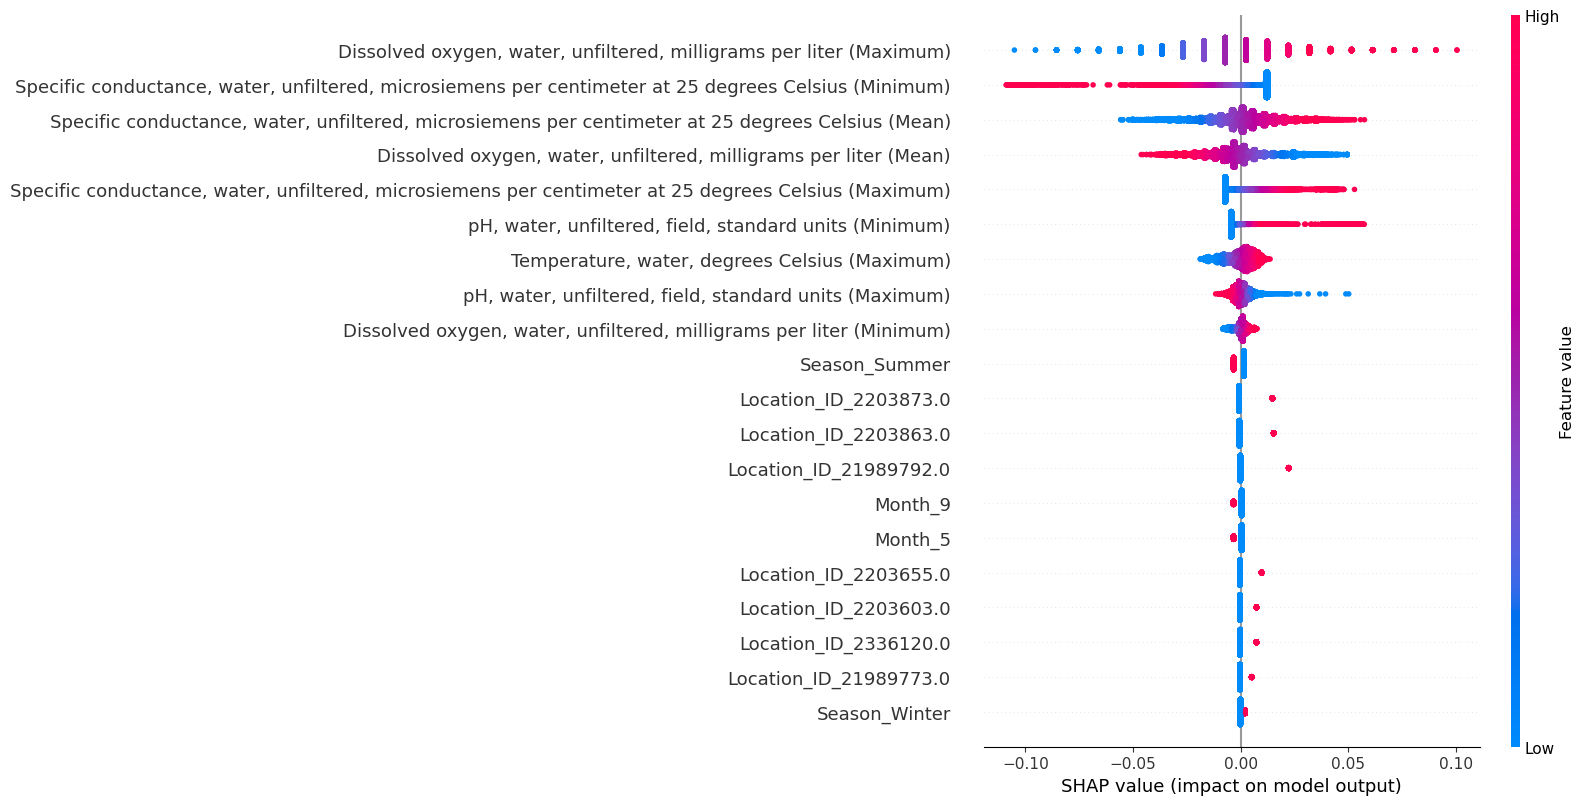

Lightgbm Model File Paths: ['F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\best_lightGBM_model.joblib', 'F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\shap_on_test\\best_lightGBM_shap_bar.png', 'F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\shap_on_test\\best_lightGBM_shap_val.png']
Tree Based Model...


Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


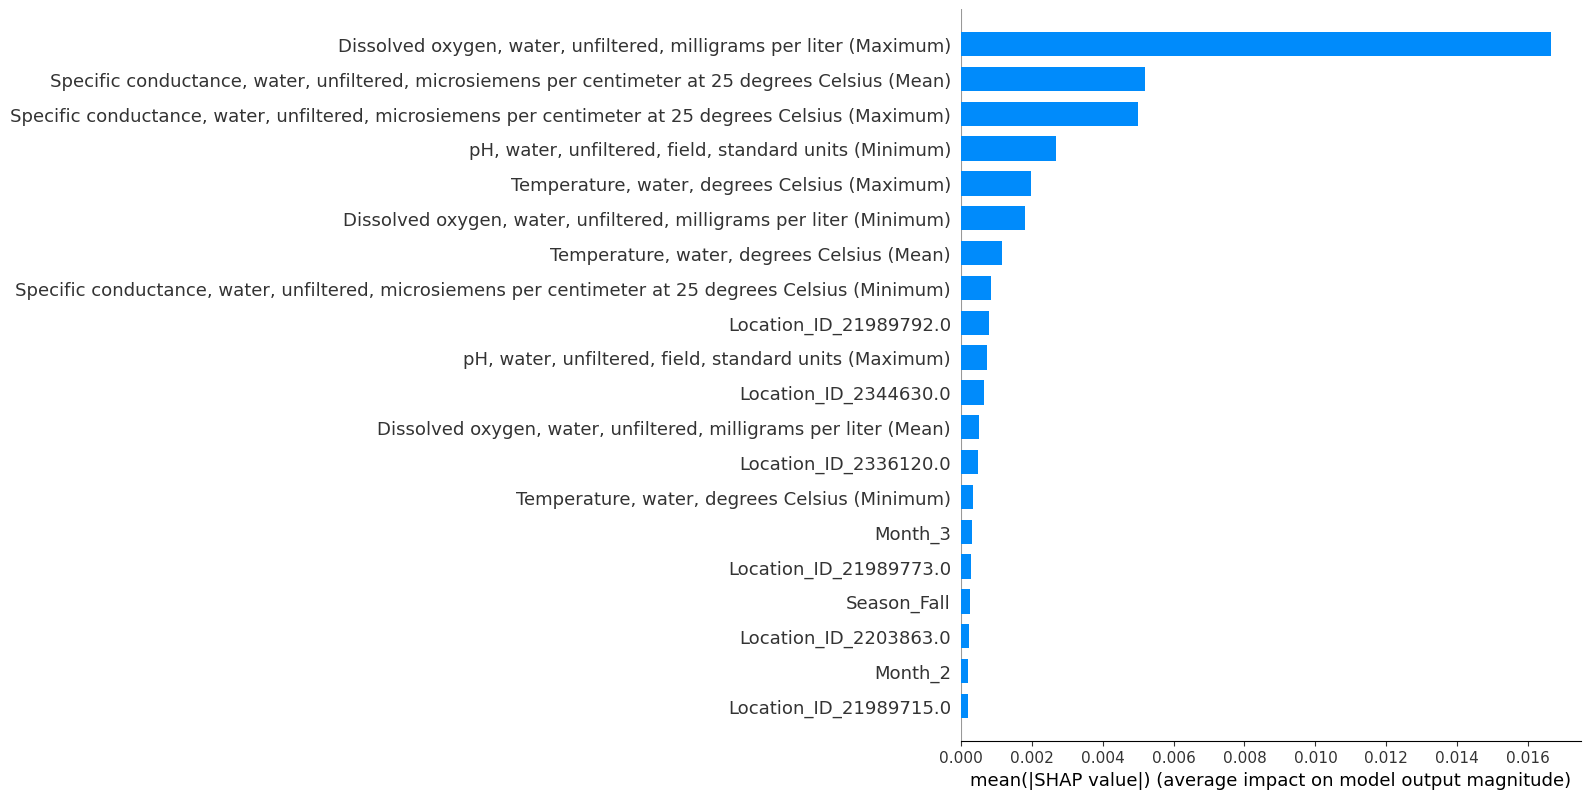

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


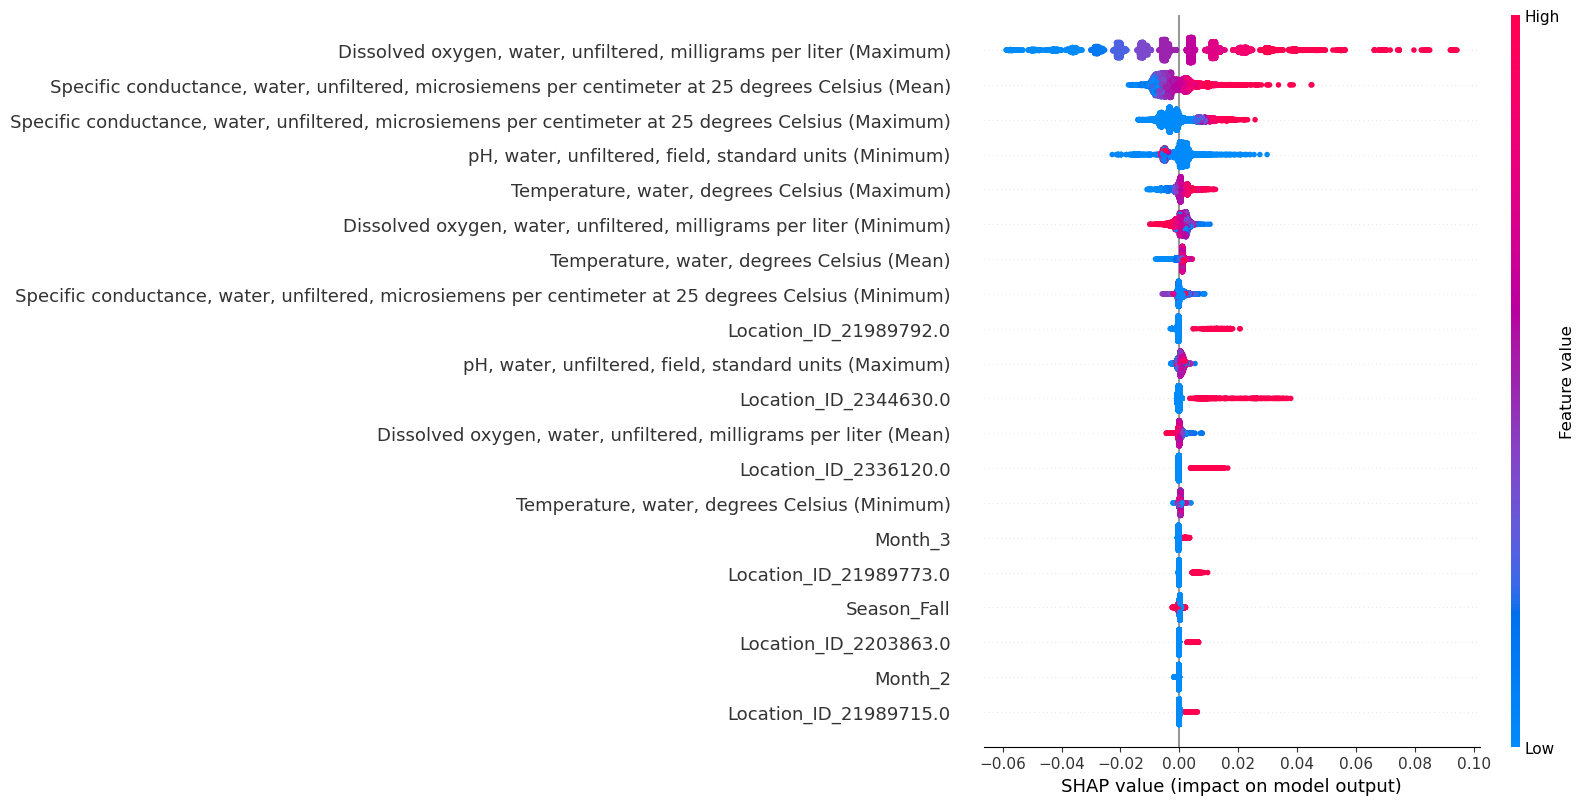

Rf Model File Paths: ['F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\best_rf_model.joblib', 'F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\shap_on_test\\best_rf_shap_bar.png', 'F:\\2022_Paper_03232023\\9 Water quality\\Code from Github\\water-quality-prediction-08-27-yl-rerun\\results\\cv5_withCategorical_withstd\\shap_on_test\\best_rf_shap_val.png']
Tree Based Model...


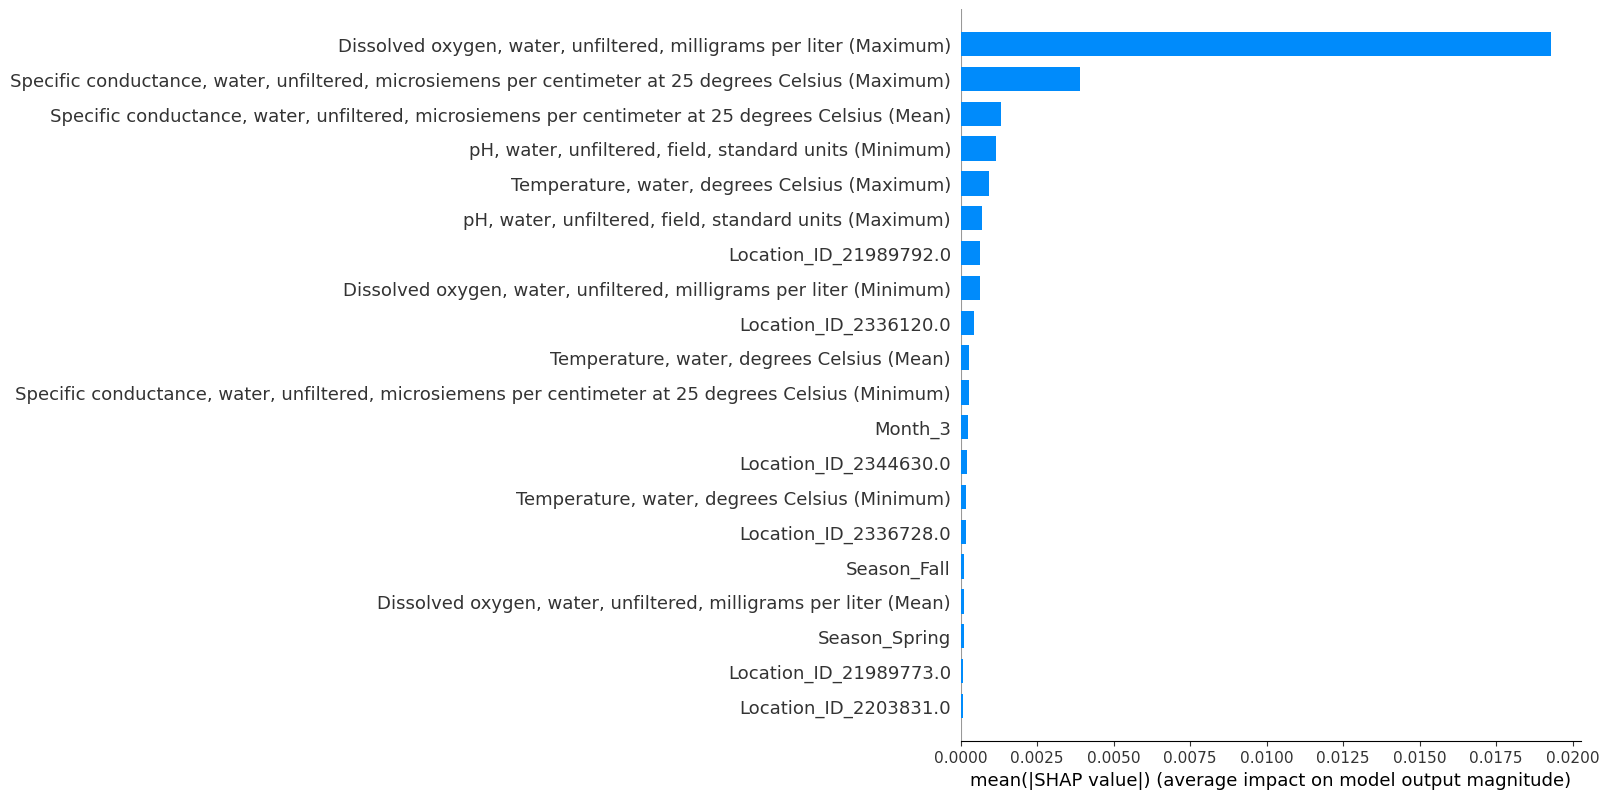

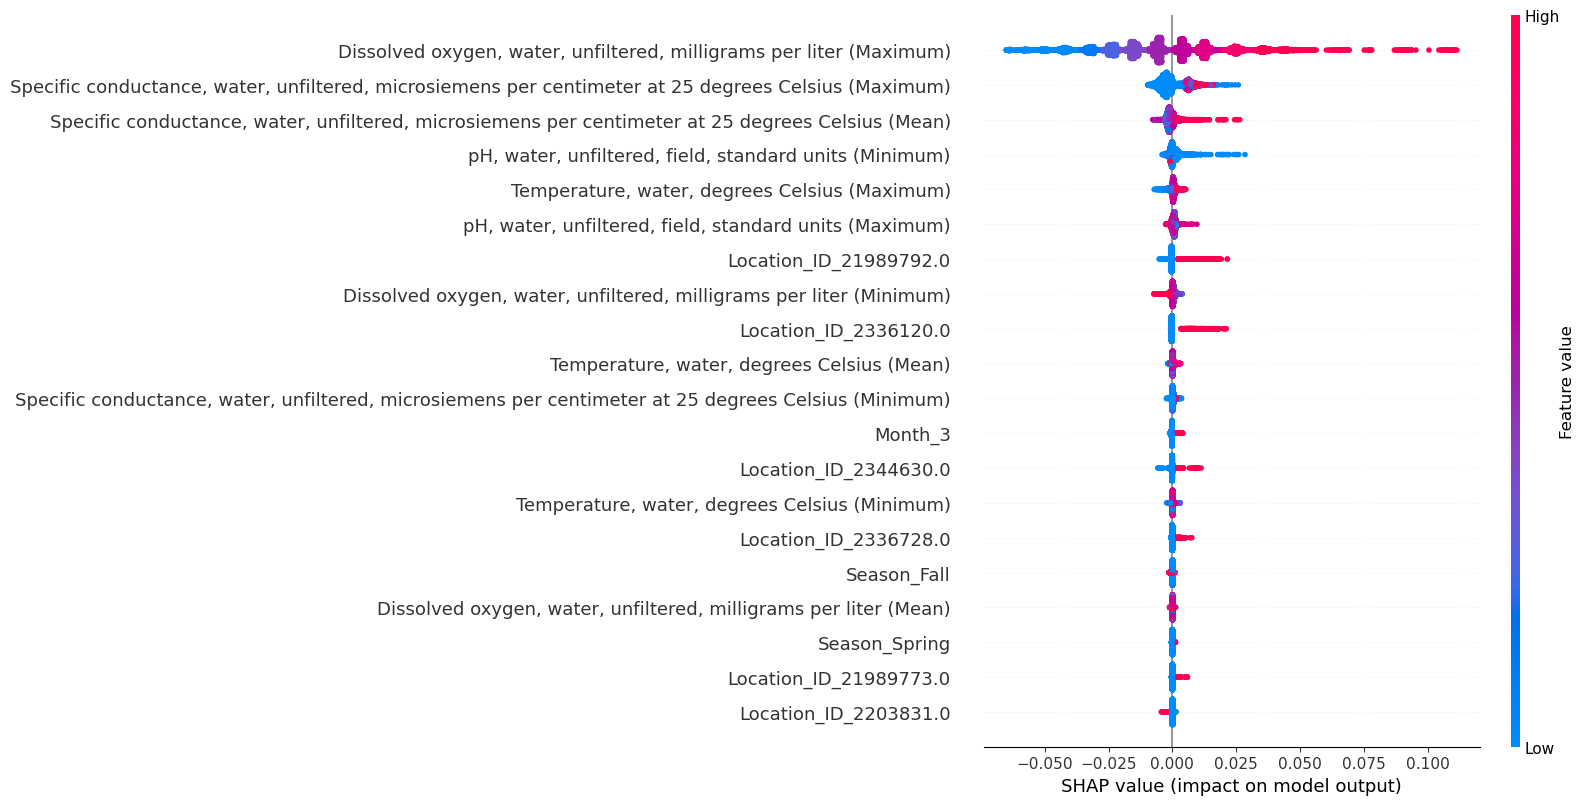

In [9]:
for model_name in model_names:
    file_paths = generate_file_paths_for_shap_2(path_, model_name, rel_path)
    # model_file_paths[model_name] = file_paths
    print(f"{model_name.capitalize()} Model File Paths:", file_paths)

    gen_shap_results(
        load_file_path = file_paths[0]
        , save_file_path_1 = file_paths[1]
        , save_file_path_2 = file_paths[2]
        , refit_X = X_test_preprocessed_df
       # , refit_y = y_test
        , figure_dpi = 300
    )

